In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

In [10]:
path = os.getcwd()
data = pd.read_csv(path+"/preprocessed_dataset.csv")

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (9,12,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [12]:
data.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Portion,DaysToDisboursment,DayStream,EndOfLoanDate,DaysToDefault,Recession
0,1004255009,"Leo Arretin, Inc.",LOS ANGELES,CA,90013,CALIFORNIA BANK & TRUST,CA,422120,2001-03-13,2001,...,0,0,50000,25000,0.5,383,1080,2005-03-15,NaN,0
1,1004315003,TRI-COUNTY AMBULANCE SERV. INC,NAPPANEE,IN,46550,"KEY DIRECT, A BRANCH OF",OH,621910,2001-04-09,2001,...,0,0,119000,59500,0.5,82,1800,2006-06-04,NaN,0
2,1004335009,P & J ENTERPRISE,MISSION VIEJO,CA,92691,CALIFORNIA BANK & TRUST,CA,421690,2001-04-12,2001,...,0,0,50000,25000,0.5,475,1080,2005-07-15,NaN,0
3,1004385002,"ARTEMIS, A DESIGN AGENCY",SAN DIEGO,CA,92130,CALIFORNIA BANK & TRUST,CA,541430,2001-04-30,2001,...,0,0,25000,12500,0.5,92,1080,2004-07-15,NaN,0
4,1004415009,WILLIAMS-WALLACE MANAGEMENT CO,OAKLAND,CA,94612,CALIFORNIA BANK & TRUST,CA,541519,2001-04-30,2001,...,0,0,50000,25000,0.5,31,1080,2004-05-15,NaN,0


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887045 entries, 0 to 887044
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   LoanNr_ChkDgt       887045 non-null  int64  
 1   Name                887031 non-null  object 
 2   City                887018 non-null  object 
 3   State               887034 non-null  object 
 4   Zip                 887045 non-null  int64  
 5   Bank                885573 non-null  object 
 6   BankState           885566 non-null  object 
 7   NAICS               887045 non-null  int64  
 8   ApprovalDate        887045 non-null  object 
 9   ApprovalFY          887045 non-null  object 
 10  Term                887045 non-null  int64  
 11  NoEmp               887045 non-null  int64  
 12  NewExist            887045 non-null  object 
 13  CreateJob           887045 non-null  int64  
 14  RetainedJob         887045 non-null  int64  
 15  FranchiseCode       887045 non-nul

In [152]:
data["State"].value_counts()

CA    127272
TX     69426
NY     57278
FL     40552
PA     34899
OH     32367
IL     29340
MA     24608
MN     24259
NJ     23856
WA     22960
GA     21155
WI     20954
MO     20550
CO     20405
MI     20371
UT     18682
AZ     17352
NC     14186
IN     14041
MD     13179
VA     12805
CT     12074
NH     12051
IA     11905
KS     11360
OR     10939
OK      9853
LA      9492
ID      9426
TN      9309
RI      8973
MT      8702
AL      8291
NV      7944
KY      7658
MS      7620
NE      6328
AR      6277
NM      5990
ME      5907
SC      5549
VT      5430
ND      5228
SD      4371
HI      3583
WV      3269
WY      2820
AK      2387
DE      2198
DC      1603
Name: State, dtype: int64

In [44]:
print(len(data["State"].value_counts()))

51


In [47]:
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m', category='cultural', name=shapename)

i = 0
l = []
for state in shpreader.Reader(states_shp).records():
    i += 1
    l.append(state.attributes['name'])
    print(state.attributes['name'])
print()
print(i)
l.sort()

Minnesota
Montana
North Dakota
Hawaii
Idaho
Washington
Arizona
California
Colorado
Nevada
New Mexico
Oregon
Utah
Wyoming
Arkansas
Iowa
Kansas
Missouri
Nebraska
Oklahoma
South Dakota
Louisiana
Texas
Connecticut
Massachusetts
New Hampshire
Rhode Island
Vermont
Alabama
Florida
Georgia
Mississippi
South Carolina
Illinois
Indiana
Kentucky
North Carolina
Ohio
Tennessee
Virginia
Wisconsin
West Virginia
Delaware
District of Columbia
Maryland
New Jersey
New York
Pennsylvania
Maine
Michigan
Alaska

51


In [53]:
l

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [136]:
us_state_abbrev = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'DC': 'District of Columbia',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

state_abbrev_1 = []
for state in us_state_abbrev:
    state_abbrev_1.append(state)
state_abbrev_1.sort()
state_abbrev_1 = np.array(state_abbrev_1, dtype='<U2')

In [137]:
state_abbrev_1

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype='<U2')

In [138]:
np.sort(np.array(data["State"].unique(), dtype='<U2'))

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', 'na'], dtype='<U2')

In [139]:
np.array_equal(state_abbrev_1, np.sort(np.array(data["State"].unique(), dtype='<U2')))

False

In [144]:
default_rate = {}

for state in us_state_abbrev.values():
    default_rate[state] = 0
    
for i in range(len(data)):
    if data["State"][i] in us_state_abbrev:
        default_rate[us_state_abbrev[data["State"][i]]] += data["MIS_Status"][i]

for state in us_state_abbrev:
    default_rate[us_state_abbrev[state]] = default_rate[us_state_abbrev[state]] / data["State"].value_counts()[state]

In [145]:
default_rate

{'Alabama': 0.1727174044144253,
 'Alaska': 0.11311269375785504,
 'Arizona': 0.21328953434762563,
 'Arkansas': 0.16950772662099728,
 'California': 0.1927368156389465,
 'Colorado': 0.17995589316344032,
 'Connecticut': 0.1439456683783336,
 'Delaware': 0.18562329390354868,
 'District of Columbia': 0.2694946974422957,
 'Florida': 0.2849921088972184,
 'Georgia': 0.2546442921295202,
 'Hawaii': 0.15964275746581078,
 'Idaho': 0.14279652026310205,
 'Illinois': 0.2322085889570552,
 'Indiana': 0.17997293640054127,
 'Iowa': 0.11667366652666947,
 'Kansas': 0.1329225352112676,
 'Kentucky': 0.19809349699660486,
 'Louisiana': 0.1903708386009271,
 'Maine': 0.09920433384120535,
 'Maryland': 0.2132179983306776,
 'Massachusetts': 0.13536248374512352,
 'Michigan': 0.23018015806784153,
 'Minnesota': 0.11863638237355209,
 'Mississippi': 0.16391076115485564,
 'Missouri': 0.15552311435523114,
 'Montana': 0.06871983452079981,
 'Nebraska': 0.11362199747155499,
 'Nevada': 0.23829305135951662,
 'New Hampshire': 0.1

In [196]:
max(default_rate.values())

0.2849921088972184

In [162]:
newexist_rate = {}

for state in us_state_abbrev.values():
    newexist_rate[state] = 0
    
for i in range(len(data)):
    if data["State"][i] in us_state_abbrev and data["NewExist"][i] == 2:
        newexist_rate[us_state_abbrev[data["State"][i]]] += 1

for state in us_state_abbrev:
    newexist_rate[us_state_abbrev[state]] = newexist_rate[us_state_abbrev[state]] / data["State"].value_counts()[state]

In [192]:
newexist_rate

{'Alabama': 0.33663008081051743,
 'Alaska': 0.22957687473816507,
 'Arizona': 0.20775703088981098,
 'Arkansas': 0.32738569380277205,
 'California': 0.1458058331761896,
 'Colorado': 0.2038716000980152,
 'Connecticut': 0.1847772072221302,
 'Delaware': 0.2816196542311192,
 'District of Columbia': 0.25701809107922646,
 'Florida': 0.24272538962319984,
 'Georgia': 0.31387378870243443,
 'Hawaii': 0.2997488138431482,
 'Idaho': 0.2557818799066412,
 'Illinois': 0.278118609406953,
 'Indiana': 0.2951356740972865,
 'Iowa': 0.3070978580428391,
 'Kansas': 0.2919014084507042,
 'Kentucky': 0.3188822146774615,
 'Louisiana': 0.32701222081753056,
 'Maine': 0.276620958185204,
 'Maryland': 0.2991122239927157,
 'Massachusetts': 0.21241059817945385,
 'Michigan': 0.26802807913209953,
 'Minnesota': 0.20994270167772786,
 'Mississippi': 0.3359580052493438,
 'Missouri': 0.29669099756691,
 'Montana': 0.2262698230291887,
 'Nebraska': 0.3418141592920354,
 'Nevada': 0.2351460221550856,
 'New Hampshire': 0.1582441291179

In [195]:
max(newexist_rate.values())

0.3848271642704191

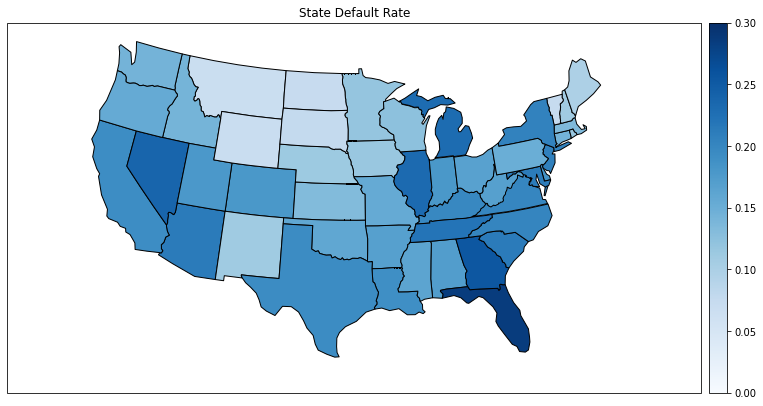

In [188]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())
ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

cm = plt.get_cmap('Blues')
sm = plt.cm.ScalarMappable(cmap=cm, norm=plt.Normalize(0,0.3))
plt.colorbar(sm, ax=ax, fraction=0.0257, pad=0.01)

#ax.background_patch.set_visible(False)
#ax.outline_patch.set_visible(False)

ax.set_title('State Default Rate')


for astate in shpreader.Reader(states_shp).records():


    edgecolor = 'black'

    try:
        state_default_rate = default_rate[astate.attributes['name']]
    except:
        state_default_rate = 0
        
    facecolor = cm(1.*state_default_rate/0.3)

    ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor)



plt.show()

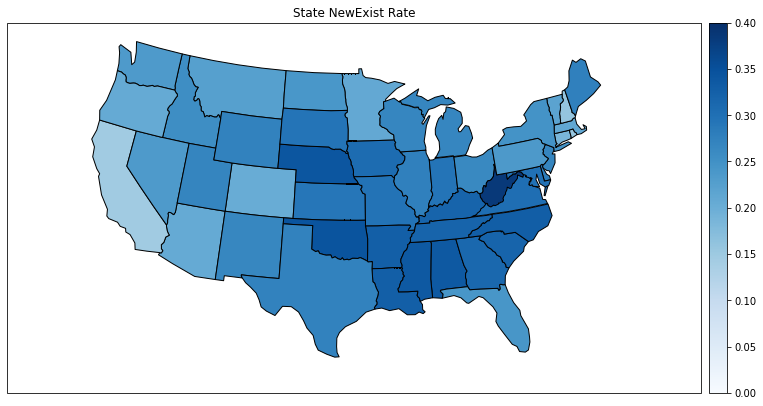

In [191]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())
ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

cm = plt.get_cmap('Blues')
sm = plt.cm.ScalarMappable(cmap=cm, norm=plt.Normalize(0,0.4))
plt.colorbar(sm, ax=ax, fraction=0.0257, pad=0.01)

#ax.background_patch.set_visible(False)
#ax.outline_patch.set_visible(False)

ax.set_title('State NewExist Rate')

#for state in shpreader.Reader(states_shp).geometries():
for astate in shpreader.Reader(states_shp).records():

    ### You want to replace the following code with code that sets the
    ### facecolor as a gradient based on the population density above
    #facecolor = [0.9375, 0.9375, 0.859375]

    edgecolor = 'black'

    try:
        # use the name of this state to get pop_density
        state_newexist_rate = newexist_rate[astate.attributes['name']]
    except:
        state_newexist_rate = 0
        
    facecolor = cm(1.*state_newexist_rate/0.4)

    # `astate.geometry` is the polygon to plot
    ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor)



plt.show()